<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-feracor/blob/main/A01794022_Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

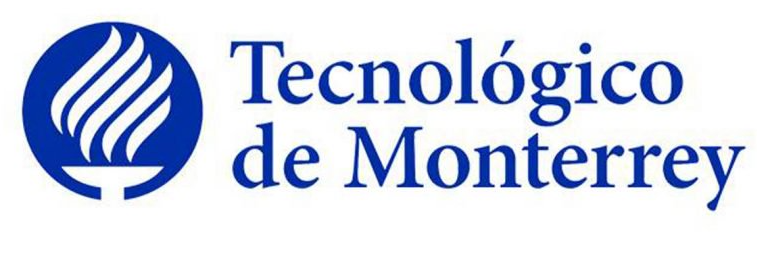

# **Ciencia y analítica de datos**
**Actividad Semanal - 11 Octubre  de 2022**

**Jobish Vallikavungal Devassia - Maricarmen Vázquez Rojí**



*   Fernando Acevedo Ortegate - A01794022   



## **Parte 1: Ejercicio guiado**



**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**
* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [98]:
# Guardar dataframe, poner nombre a las columnas.

df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
df.columns = ['NT_dollar','Gender','Education ','Marital status','Age ','past_pay_Apr','past_pay_May','past_pay_Jun','past_pay_Jul','past_pay_Aug','past_pay_Sep',
              'Bill_statament_Sep','Bill_statament_Aug','Bill_statament_Jul','Bill_statament_Jun','Bill_statament_May','Bill_statament_Apr',
              'prev_payment_Sep','prev_payment_Aug','prev_payment_Jul','prev_payment_Jun','prev_payment_May','prev_payment_Apr','Y']
df.head(10)

NT_dollar  Gender  Education   Marital status  Age   past_pay_Apr  \
ID                                                                      
1       20000     2.0         2.0             1.0  24.0           2.0   
2      120000     2.0         2.0             2.0  26.0          -1.0   
3       90000     2.0         2.0             2.0  34.0           0.0   
4       50000     2.0         2.0             1.0  37.0           0.0   
5       50000     1.0         2.0             1.0  57.0          -1.0   
6       50000     1.0         1.0             2.0  37.0           0.0   
7      500000     1.0         1.0             2.0  29.0           0.0   
8      100000     2.0         2.0             2.0  23.0           0.0   
9      140000     2.0         3.0             1.0  28.0           0.0   
10      20000     1.0         3.0             2.0  35.0          -2.0   

    past_pay_May  past_pay_Jun  past_pay_Jul  past_pay_Aug  ...  \
ID                                                          ...   
1            2.0          -1.0          -1.0          -2.0  ...   
2            2.0           0.0           0.0           0.0  ...   
3            0.0           0.0           0.0           0.0  ...   
4            0.0           0.0           0.0           0.0  ...   
5            0.0          -1.0           0.0           0.0  ...   
6            0.0           0.0           0.0           0.0  ...   
7            0.0           0.0           0.0           0.0  ...   
8           -1.0          -1.0           0.0           0.0  ...   
9            0.0           2.0           0.0           0.0  ...   
10          -2.0          -2.0          -2.0          -1.0  ...   

    Bill_statament_Jun  Bill_statament_May  Bill_statament_Apr  \
ID                                                               
1                  0.0                 0.0                 0.0   
2               3272.0              3455.0              3261.0   
3              14331.0             14948.0             15549.0   
4              28314.0             28959.0             29547.0   
5              20940.0             19146.0             19131.0   
6              19394.0             19619.0             20024.0   
7             542653.0            483003.0            473944.0   
8                221.0              -159.0               567.0   
9              12211.0             11793.0              3719.0   
10                 0.0             13007.0             13912.0   

    prev_payment_Sep  prev_payment_Aug  prev_payment_Jul  prev_payment_Jun  \
ID                                                                           
1                0.0             689.0               0.0               0.0   
2                0.0            1000.0            1000.0            1000.0   
3             1518.0            1500.0            1000.0            1000.0   
4             2000.0            2019.0            1200.0            1100.0   
5             2000.0           36681.0           10000.0            9000.0   
6             2500.0            1815.0             657.0            1000.0   
7            55000.0           40000.0           38000.0           20239.0   
8              380.0             601.0               0.0             581.0   
9             3329.0               0.0             432.0            1000.0   
10               0.0               0.0               0.0           13007.0   

    prev_payment_May  prev_payment_Apr    Y  
ID                                           
1                0.0               0.0  1.0  
2                0.0            2000.0  1.0  
3             1000.0            5000.0  0.0  
4             1069.0            1000.0  0.0  
5              689.0             679.0  0.0  
6             1000.0             800.0  0.0  
7            13750.0           13770.0  0.0  
8             1687.0            1542.0  0.0  
9             1000.0            1000.0  0.0  
10            1122.0               0.0  0.0  

[10 rows x 24 columns]

In [99]:
# Ver infomacion detallada del "df"

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NT_dollar           30000 non-null  int64  
 1   Gender              29999 non-null  float64
 2   Education           29998 non-null  float64
 3   Marital status      29998 non-null  float64
 4   Age                 29995 non-null  float64
 5   past_pay_Apr        29997 non-null  float64
 6   past_pay_May        29995 non-null  float64
 7   past_pay_Jun        29993 non-null  float64
 8   past_pay_Jul        29991 non-null  float64
 9   past_pay_Aug        29984 non-null  float64
 10  past_pay_Sep        29986 non-null  float64
 11  Bill_statament_Sep  29989 non-null  float64
 12  Bill_statament_Aug  29989 non-null  float64
 13  Bill_statament_Jul  29987 non-null  float64
 14  Bill_statament_Jun  29985 non-null  float64
 15  Bill_statament_May  29983 non-null  float64
 16  Bill

In [100]:
# Agrupar y reducir filas

df.dropna(inplace = True)
df.isna().values.any()
df

NT_dollar  Gender  Education   Marital status  Age   past_pay_Apr  \
ID                                                                         
1          20000     2.0         2.0             1.0  24.0           2.0   
2         120000     2.0         2.0             2.0  26.0          -1.0   
3          90000     2.0         2.0             2.0  34.0           0.0   
4          50000     2.0         2.0             1.0  37.0           0.0   
5          50000     1.0         2.0             1.0  57.0          -1.0   
...          ...     ...         ...             ...   ...           ...   
29996     220000     1.0         3.0             1.0  39.0           0.0   
29997     150000     1.0         3.0             2.0  43.0          -1.0   
29998      30000     1.0         2.0             2.0  37.0           4.0   
29999      80000     1.0         3.0             1.0  41.0           1.0   
30000      50000     1.0         2.0             1.0  46.0           0.0   

       past_pay_May  past_pay_Jun  past_pay_Jul  past_pay_Aug  ...  \
ID                                                             ...   
1               2.0          -1.0          -1.0          -2.0  ...   
2               2.0           0.0           0.0           0.0  ...   
3               0.0           0.0           0.0           0.0  ...   
4               0.0           0.0           0.0           0.0  ...   
5               0.0          -1.0           0.0           0.0  ...   
...             ...           ...           ...           ...  ...   
29996           0.0           0.0           0.0           0.0  ...   
29997          -1.0          -1.0          -1.0           0.0  ...   
29998           3.0           2.0          -1.0           0.0  ...   
29999          -1.0           0.0           0.0           0.0  ...   
30000           0.0           0.0           0.0           0.0  ...   

       Bill_statament_Jun  Bill_statament_May  Bill_statament_Apr  \
ID                                                                  
1                     0.0                 0.0                 0.0   
2                  3272.0              3455.0              3261.0   
3                 14331.0             14948.0             15549.0   
4                 28314.0             28959.0             29547.0   
5                 20940.0             19146.0             19131.0   
...                   ...                 ...                 ...   
29996             88004.0             31237.0             15980.0   
29997              8979.0              5190.0                 0.0   
29998             20878.0             20582.0             19357.0   
29999             52774.0             11855.0             48944.0   
30000             36535.0             32428.0             15313.0   

       prev_payment_Sep  prev_payment_Aug  prev_payment_Jul  prev_payment_Jun  \
ID                                                                              
1                   0.0             689.0               0.0               0.0   
2                   0.0            1000.0            1000.0            1000.0   
3                1518.0            1500.0            1000.0            1000.0   
4                2000.0            2019.0            1200.0            1100.0   
5                2000.0           36681.0           10000.0            9000.0   
...                 ...               ...               ...               ...   
29996            8500.0           20000.0            5003.0            3047.0   
29997            1837.0            3526.0            8998.0             129.0   
29998               0.0               0.0           22000.0            4200.0   
29999           85900.0            3409.0            1178.0            1926.0   
30000            2078.0            1800.0            1430.0            1000.0   

       prev_payment_May  prev_payment_Apr    Y  
ID                                              
1                   0.0               0.0  1.0  
2       

In [101]:
# Visualizar las dimensiones del df

print('La cantidad de columnas es: ', df.shape[1])
print('La cantidad de filas es: ', df.shape[0])

La cantidad de columnas es:  24
La cantidad de filas es:  29958


In [102]:
# Eliminar variables cualitativas

df2 = df.drop(['Gender','Education ','Marital status','Age ','Y'], axis=1) 
df2


NT_dollar  past_pay_Apr  past_pay_May  past_pay_Jun  past_pay_Jul  \
ID                                                                         
1          20000           2.0           2.0          -1.0          -1.0   
2         120000          -1.0           2.0           0.0           0.0   
3          90000           0.0           0.0           0.0           0.0   
4          50000           0.0           0.0           0.0           0.0   
5          50000          -1.0           0.0          -1.0           0.0   
...          ...           ...           ...           ...           ...   
29996     220000           0.0           0.0           0.0           0.0   
29997     150000          -1.0          -1.0          -1.0          -1.0   
29998      30000           4.0           3.0           2.0          -1.0   
29999      80000           1.0          -1.0           0.0           0.0   
30000      50000           0.0           0.0           0.0           0.0   

       past_pay_Aug  past_pay_Sep  Bill_statament_Sep  Bill_statament_Aug  \
ID                                                                          
1              -2.0          -2.0              3913.0              3102.0   
2               0.0           2.0              2682.0              1725.0   
3               0.0           0.0             29239.0             14027.0   
4               0.0           0.0             46990.0             48233.0   
5               0.0           0.0              8617.0              5670.0   
...             ...           ...                 ...                 ...   
29996           0.0           0.0            188948.0            192815.0   
29997           0.0           0.0              1683.0              1828.0   
29998           0.0           0.0              3565.0              3356.0   
29999           0.0          -1.0             -1645.0             78379.0   
30000           0.0           0.0             47929.0             48905.0   

       Bill_statament_Jul  Bill_statament_Jun  Bill_statament_May  \
ID                                                                  
1                   689.0                 0.0                 0.0   
2                  2682.0              3272.0              3455.0   
3                 13559.0             14331.0             14948.0   
4                 49291.0             28314.0             28959.0   
5                 35835.0             20940.0             19146.0   
...                   ...                 ...                 ...   
29996            208365.0             88004.0             31237.0   
29997              3502.0              8979.0              5190.0   
29998              2758.0             20878.0             20582.0   
29999             76304.0             52774.0             11855.0   
30000             49764.0             36535.0             32428.0   

       Bill_statament_Apr  prev_payment_Sep  prev_payment_Aug  \
ID                                                              
1                     0.0               0.0             689.0   
2                  3261.0               0.0            1000.0   
3                 15549.0            1518.0            1500.0   
4                 29547.0            2000.0            2019.0   
5                 19131.0            2000.0           36681.0   
...                   ...               ...               ...   
29996             15980.0            8500.0           20000.0   
29997                 0.0            1837.0            3526.0   
29998             19357.0               0.0               0.0   
29999             48944.0           85900.0            3409.0   
30000             15313.0            2078.0            1800.0   

       prev_payment_Jul  prev_payment_Jun  prev_payment_May  prev_payment_Apr  
ID                                                                             
1                   0.0               0.0               0.0               0.0  
2                1000.0         

In [103]:
# Organizar en orden temporal

df2 = df2.reindex(columns=['NT_dollar','past_pay_Apr','past_pay_May','past_pay_Jun','past_pay_Jul','past_pay_Aug','past_pay_Sep',
    'Bill_statament_Apr','Bill_statament_May','Bill_statament_Jun','Bill_statament_Jul','Bill_statament_Aug','Bill_statament_Sep',
    'prev_payment_Apr','prev_payment_May','prev_payment_Jun','prev_payment_Jul','prev_payment_Aug','prev_payment_Sep','Y'])
df2.head(10)

NT_dollar  past_pay_Apr  past_pay_May  past_pay_Jun  past_pay_Jul  \
ID                                                                      
1       20000           2.0           2.0          -1.0          -1.0   
2      120000          -1.0           2.0           0.0           0.0   
3       90000           0.0           0.0           0.0           0.0   
4       50000           0.0           0.0           0.0           0.0   
5       50000          -1.0           0.0          -1.0           0.0   
6       50000           0.0           0.0           0.0           0.0   
7      500000           0.0           0.0           0.0           0.0   
8      100000           0.0          -1.0          -1.0           0.0   
9      140000           0.0           0.0           2.0           0.0   
10      20000          -2.0          -2.0          -2.0          -2.0   

    past_pay_Aug  past_pay_Sep  Bill_statament_Apr  Bill_statament_May  \
ID                                                                       
1           -2.0          -2.0                 0.0                 0.0   
2            0.0           2.0              3261.0              3455.0   
3            0.0           0.0             15549.0             14948.0   
4            0.0           0.0             29547.0             28959.0   
5            0.0           0.0             19131.0             19146.0   
6            0.0           0.0             20024.0             19619.0   
7            0.0           0.0            473944.0            483003.0   
8            0.0          -1.0               567.0              -159.0   
9            0.0           0.0              3719.0             11793.0   
10          -1.0          -1.0             13912.0             13007.0   

    Bill_statament_Jun  Bill_statament_Jul  Bill_statament_Aug  \
ID                                                               
1                  0.0               689.0              3102.0   
2               3272.0              2682.0              1725.0   
3              14331.0             13559.0             14027.0   
4              28314.0             49291.0             48233.0   
5              20940.0             35835.0              5670.0   
6              19394.0             57608.0             57069.0   
7             542653.0            445007.0            412023.0   
8                221.0               601.0               380.0   
9              12211.0             12108.0             14096.0   
10                 0.0                 0.0                 0.0   

    Bill_statament_Sep  prev_payment_Apr  prev_payment_May  prev_payment_Jun  \
ID                                                                             
1               3913.0               0.0               0.0               0.0   
2               2682.0            2000.0               0.0            1000.0   
3              29239.0            5000.0            1000.0            1000.0   
4              46990.0            1000.0            1069.0            1100.0   
5               8617.0             679.0             689.0            9000.0   
6              64400.0             800.0            1000.0            1000.0   
7             367965.0           13770.0           13750.0           20239.0   
8              11876.0            1542.0            1687.0             581.0   
9              11285.0            1000.0            1000.0            1000.0   
10                 0.0               0.0            1122.0           13007.0   

    prev_payment_Jul  prev_payment_Aug  prev_payment_Sep   Y  
ID                                                            
1                0.0             689.0               0.0 NaN  
2             1000.0            1000.0               0.0 NaN  
3             1000.0            1500.0            1518.0 NaN  
4             1200.0            2019.0            2000.0 NaN  
5            10000.0           36681.0            2000.0 NaN  
6              657.0            1815.0     

In [124]:
# Agrupar por promedio de grupos por trimestre y eliminar filas operadas

medi = df2.copy()  # Crear una copia para promerios

medi['med_past_pay_Apr_Jun'] = medi[['past_pay_Apr','past_pay_May','past_pay_Jun']].mean(axis = 1) # Promedio tiempo de pagos adelantados
medi['med_past_pay_Jul_Sep'] = medi[['past_pay_Jul','past_pay_Aug','past_pay_Sep']].mean(axis = 1) # Promedio tiempo de pagos adelantados
medi = medi.drop(['past_pay_Apr','past_pay_May','past_pay_Jun','past_pay_Jul','past_pay_Aug','past_pay_Sep'], axis=1) # Eliminar columnas promediadas

medi['med_Bill_statamen_Apr_Jun'] = medi[['Bill_statament_Jun','Bill_statament_May','Bill_statament_Apr']].mean(axis = 1)# Promedio valor de pagos realizados
medi['med_Bill_statament_Jul_Sep'] = medi[['Bill_statament_Sep','Bill_statament_Aug','Bill_statament_Jul']].mean(axis = 1)# Promedio valor de pagos realizados
medi = medi.drop(['Bill_statament_Sep','Bill_statament_Aug','Bill_statament_Jul','Bill_statament_Jun','Bill_statament_May','Bill_statament_Apr'], axis=1) # Eliminar columnas promediadas

medi['med_prev_payment_Apr_Jun'] = medi[['prev_payment_Jun','prev_payment_May','prev_payment_Apr']].mean(axis = 1) # Promedio pagos adelantados
medi['med_prev_payment_Jul_Sep'] = medi[['prev_payment_Sep','prev_payment_Aug','prev_payment_Jul']].mean(axis = 1) # Promedio pagos adelantados
medi = medi.drop(['prev_payment_Sep','prev_payment_Aug','prev_payment_Jul','prev_payment_Jun','prev_payment_May','prev_payment_Apr'], axis=1) # Eliminar columnas promediadas

medi

NT_dollar   Y  med_past_pay_Apr_Jun  med_past_pay_Jul_Sep  \
ID                                                                 
1          20000 NaN              1.000000             -1.666667   
2         120000 NaN              0.333333              0.666667   
3          90000 NaN              0.000000              0.000000   
4          50000 NaN              0.000000              0.000000   
5          50000 NaN             -0.666667              0.000000   
...          ...  ..                   ...                   ...   
29996     220000 NaN              0.000000              0.000000   
29997     150000 NaN             -1.000000             -0.333333   
29998      30000 NaN              3.000000             -0.333333   
29999      80000 NaN              0.000000             -0.333333   
30000      50000 NaN              0.000000              0.000000   

       med_Bill_statamen_Apr_Jun  med_Bill_statament_Jul_Sep  \
ID                                                             
1                       0.000000                 2568.000000   
2                    3329.333333                 2363.000000   
3                   14942.666667                18941.666667   
4                   28940.000000                48171.333333   
5                   19739.000000                16707.333333   
...                          ...                         ...   
29996               45073.666667               196709.333333   
29997                4723.000000                 2337.666667   
29998               20272.333333                 3226.333333   
29999               37857.666667                51012.666667   
30000               28092.000000                48866.000000   

       med_prev_payment_Apr_Jun  med_prev_payment_Jul_Sep  
ID                                                         
1                      0.000000                229.666667  
2                   1000.000000                666.666667  
3                   2333.333333               1339.333333  
4                   1056.333333               1739.666667  
5                   3456.000000              16227.000000  
...                         ...                       ...  
29996               3015.666667              11167.666667  
29997                 43.000000               4787.000000  
29998               3100.000000               7333.333333  
29999              18898.000000              30162.333333  
30000               1000.000000               1769.333333  

[29958 rows x 8 columns]

In [125]:
df3 = medi.reindex(columns=['NT_dollar','med_past_pay_Apr_Jun','med_past_pay_Jul_Sep','med_Bill_statamen_Apr_Jun','med_Bill_statament_Jul_Sep',
                            'med_prev_payment_Apr_Jun','med_prev_payment_Jul_Sep'])
df3. head(10)

NT_dollar  med_past_pay_Apr_Jun  med_past_pay_Jul_Sep  \
ID                                                          
1       20000              1.000000             -1.666667   
2      120000              0.333333              0.666667   
3       90000              0.000000              0.000000   
4       50000              0.000000              0.000000   
5       50000             -0.666667              0.000000   
6       50000              0.000000              0.000000   
7      500000              0.000000              0.000000   
8      100000             -0.666667             -0.333333   
9      140000              0.666667              0.000000   
10      20000             -2.000000             -1.333333   

    med_Bill_statamen_Apr_Jun  med_Bill_statament_Jul_Sep  \
ID                                                          
1                    0.000000                 2568.000000   
2                 3329.333333                 2363.000000   
3                14942.666667                18941.666667   
4                28940.000000                48171.333333   
5                19739.000000                16707.333333   
6                19679.000000                59692.333333   
7               499866.666667               408331.666667   
8                  209.666667                 4285.666667   
9                 9241.000000                12496.333333   
10                8973.000000                    0.000000   

    med_prev_payment_Apr_Jun  med_prev_payment_Jul_Sep  
ID                                                      
1                   0.000000                229.666667  
2                1000.000000                666.666667  
3                2333.333333               1339.333333  
4                1056.333333               1739.666667  
5                3456.000000              16227.000000  
6                 933.333333               1657.333333  
7               15919.666667              44333.333333  
8                1270.000000                327.000000  
9                1000.000000               1253.666667  
10               4709.666667                  0.000000

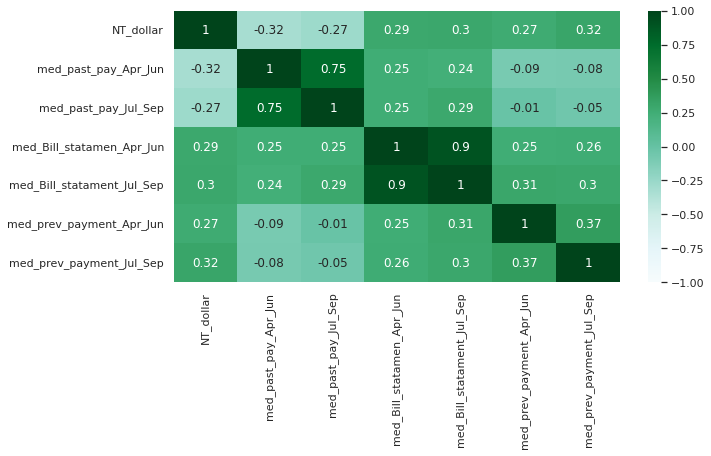

In [119]:
# Crear matriz de correlacion

sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(df3.corr().round(2), cmap="BuGn", annot=True, vmin=-1, vmax=1) 

In [128]:
pcs = PCA()

pcs.fit(df3)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]

pcsSummary.round(4)


PC1         PC2         PC3         PC4  \
Standard deviation      134531.5074  82668.3755  20078.7209  13113.8570   
Proportion of variance       0.7072      0.2670      0.0158      0.0067   
Cumulative proportion        0.7072      0.9743      0.9900      0.9967   

                              PC5     PC6     PC7  
Standard deviation      9140.9881  1.1883  0.5182  
Proportion of variance     0.0033  0.0000  0.0000  
Cumulative proportion      1.0000  1.0000  1.0000

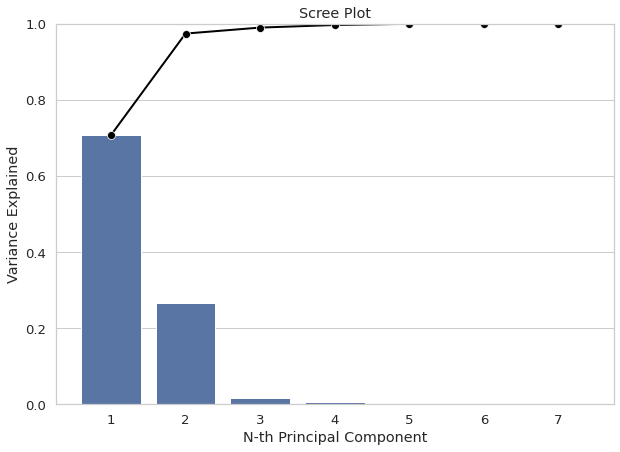

In [129]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

**Paso 2: Interprete cada componente principal en términos de las variables originales**
* Examine la magnitud y la dirección de los coeficientes de las variables originales.
* Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [130]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary.columns,
                                index = df3.columns
                                )
pcsComponents_df.iloc[:,:7]

PC1       PC2           PC3       PC4  \
NT_dollar                   0.942389 -0.333073 -1.127749e-02 -0.026607   
med_past_pay_Apr_Jun       -0.000002  0.000005 -1.642479e-07 -0.000008   
med_past_pay_Jul_Sep       -0.000001  0.000005  6.034274e-06 -0.000005   
med_Bill_statamen_Apr_Jun   0.218663  0.607187  7.451691e-01 -0.167736   
med_Bill_statament_Jul_Sep  0.249520  0.720738 -6.407201e-01  0.088021   
med_prev_payment_Apr_Jun    0.028677  0.015810  7.907682e-02  0.391877   
med_prev_payment_Jul_Sep    0.031727  0.025946  1.667946e-01  0.899912   

                                     PC5       PC6           PC7  
NT_dollar                   1.139723e-02  0.000005 -2.695488e-07  
med_past_pay_Apr_Jun       -3.435953e-07  0.687707 -7.259880e-01  
med_past_pay_Jul_Sep        2.866087e-06  0.725988  6.877073e-01  
med_Bill_statamen_Apr_Jun   9.894662e-03 -0.000009 -2.839502e-06  
med_Bill_statament_Jul_Sep  2.595542e-03 -0.000001  2.570838e-06  
med_prev_payment_Apr_Jun   -9.160280e-01  0.000005  8.795301e-07  
med_prev_payment_Jul_Sep    4.008218e-01  0.000007 -3.468637e-06

In [131]:
pcsComponents_df.PC1.idxmax()

'NT_dollar'

In [132]:
pcsComponents_df.PC1.nlargest(3)

NT_dollar                     0.942389
med_Bill_statament_Jul_Sep    0.249520
med_Bill_statamen_Apr_Jun     0.218663
Name: PC1, dtype: float64

In [135]:
pcsComponents_df.PC2.idxmin()

'NT_dollar'

In [136]:
pcsComponents_df.PC2.nsmallest(3)

NT_dollar              -0.333073
med_past_pay_Apr_Jun    0.000005
med_past_pay_Jul_Sep    0.000005
Name: PC2, dtype: float64

**Paso 3: Identifique valores atípicos**
* Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook



1.   **¿Cuál es el número de componentes mínimo y por qué?**
* d
---
2.   **¿Cuál es la variación de los datos que representan esos componentes?**
* d
---
3.   **¿Cuál es la pérdida de información después de realizar PCA?**
* d
---
4.   **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**
* d
---
5.   **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
* d
